### Objective
This notebook performs an initial exploration of the Bitcoin dataset. Key steps include:
- Loading the dataset and inspecting its structure.
- Cleaning the data by removing null values and duplicates.
- Understanding initial trends and distributions.

Loading Bitcoin Datasets. The first step is to load two separate Bitcoin datasets with overlapping date ranges.

In [ ]:
import pandas as pd

# Load Bitcoin datasets with different date ranges
BTC_2014_2024 = pd.read_csv('./Data_files/BTC-USD (2014-2024).csv', encoding='cp1252')
BTC_May_2024 = pd.read_csv('./Data_files/Bitcoin USD (01-05.2024).csv', encoding='cp1252')

In [ ]:
# Dictionary with the name of each dataset
datasets = {
  "BTC_2014_2024": BTC_2014_2024,
  "BTC_May_2024": BTC_May_2024,
}

# Apply head, info and describe to each dataset
for name, df in datasets.items():
  print(f"Dataset: {name}")
  print(f"First 5 rows: ")
  print(df.head())
  print(f"Last 5 rows: ")
  print(df.tail())
  print("\n Info: ")
  print(df.info())
  print("\n Describe: ")
  print(df.describe())
  print("\n Total IsNull Values: ")
  print(df.isnull().sum())
  print("\n Total Duplicated Values: ")
  print(df.duplicated().sum())
  print("-" * 40)

Coverting type of Date column to DateTime

In [ ]:
BTC_2014_2024['Date'] = pd.to_datetime(BTC_2014_2024['Date'])
BTC_May_2024['Date'] = pd.to_datetime(BTC_May_2024['Date'])

Combining Bitcoin datasets

In [ ]:
# BTC datasets
BTC_combined = pd.concat([BTC_May_2024, BTC_2014_2024], ignore_index=True)

Sorting by Date

In [ ]:
BTC_combined = BTC_combined.sort_values(by='Date').reset_index(drop=True)

In [ ]:
# Quick look
print(BTC_combined.head())
print(BTC_combined.info())

In [ ]:
BTC_combined.isnull().sum()

Removing duplicated and null values

In [ ]:
# Removing duplicated rows in Bitcoin dataset
BTC_combined = BTC_combined.drop_duplicates()

In [ ]:
BTC_combined.duplicated().sum()

Removing null values

In [ ]:
BTC_combined = BTC_combined.dropna()

Create new Dataset for Bitcoin

In [ ]:
BTC_combined.to_csv("./Data_files/BTC_combined_2014_2024.csv", index=False)

Basic Visualization

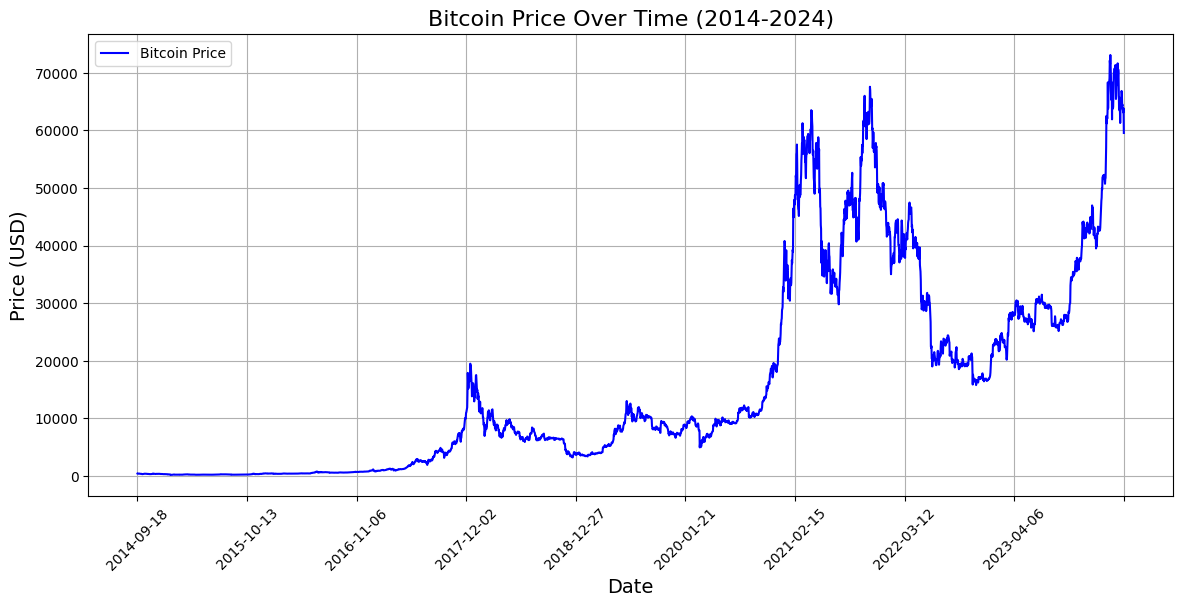

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
BTC_combined = pd.read_csv('./Data/raw_data_but_cleaned/BTC_combined_2014_2024.csv')

# Quick visualization of Bitcoin prices over time
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='Close', data=BTC_combined, label='Bitcoin Price', color='blue')

# Configurar ticks del eje X
plt.xticks(ticks=np.linspace(0, len(BTC_combined) - 1, 10, dtype=int), rotation=45)  # Muestra 10 fechas espaciadas uniformemente
plt.title('Bitcoin Price Over Time (2014-2024)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

## Observations
- The combined dataset contains daily Bitcoin prices from 2014 to 2024.
- Minimal missing values and duplicates were found and removed.
- Initial exploration shows significant price volatility over time.